In [1]:
import matplotlib.pyplot as plot
import csv
import numpy as np
import random
import glob
import scipy.stats

# Calculate z-value for 90% confidence interval
confidence_level = 0.95
z_value = scipy.stats.norm.ppf((1 + confidence_level) / 2)  # For 90% confidence interval
networks = ['3G', '4G', 'WiFi']


mean_time_null_to_cold = []  
mean_time_warm_disk_to_warm_cpu = []
std_time_null_to_cold = []
std_time_warm_disk_to_warm_cpu = []

average_time_null_to_cold = [] 
average_time_warm_disk_to_warm_cpu_process = []

for i in range(1,6):
    average_time = [] 
    for j in range(1, 11):
        file_name_list = glob.glob("../../Measurements/Lifecycle/4G/timestamp/mec/time_x86_pod_"+str(i)+"_rep_"+str(j)+"_*")
        for file_name in file_name_list:
            time_warm_disk_to_warm_cpu_process = []
            time_null_to_cold = []
            with open(file_name, newline='') as csvfile:
                spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
                for row in spamreader:
                    if row[2] == "null_to_cold_process":
                        time_null_to_cold.append(float(row[1]))
                    if row[2] == "warm_disk_to_warm_CPU_process":
                        time_warm_disk_to_warm_cpu_process.append(float(row[1]))
                average_time_warm_disk_to_warm_cpu_process.append(time_warm_disk_to_warm_cpu_process[-1]-time_warm_disk_to_warm_cpu_process[0])
                average_time_null_to_cold.append(time_null_to_cold[-1]-time_null_to_cold[0])
    mean_time_null_to_cold.append(np.mean(average_time_null_to_cold))
    std_time_null_to_cold.append(np.std(average_time_null_to_cold)/np.sqrt(len(average_time_null_to_cold)))
    mean_time_warm_disk_to_warm_cpu.append(np.mean(average_time_warm_disk_to_warm_cpu_process))
    std_time_warm_disk_to_warm_cpu.append(np.std(average_time_warm_disk_to_warm_cpu_process)/np.sqrt(len(average_time_warm_disk_to_warm_cpu_process)))

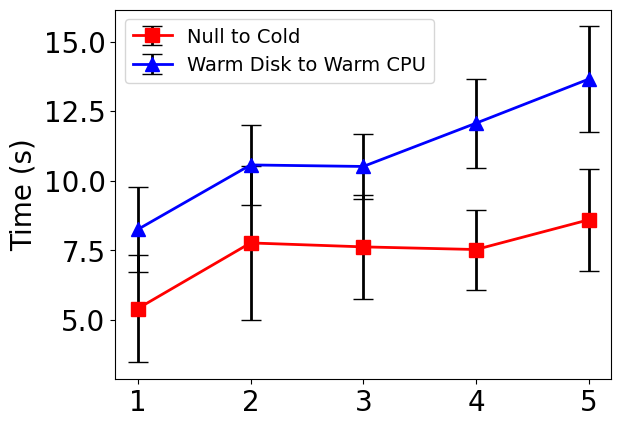

In [2]:
# data
data_null_to_cold = mean_time_null_to_cold
data_warm_disk_to_warm_cpu = mean_time_warm_disk_to_warm_cpu

error_null_to_cold = [value*z_value for value in std_time_null_to_cold]
error_warm_disk_to_warm_cpu = [value*z_value for value in std_time_warm_disk_to_warm_cpu]

pod = range(1,6)

plot.errorbar(pod, data_null_to_cold, linewidth=2, color = 'r', label = 'Null to Cold', yerr=error_null_to_cold, marker='s', markersize=10, ecolor='black', capsize=7)
plot.errorbar(pod, data_warm_disk_to_warm_cpu, linewidth=2, color = 'b', label = 'Warm Disk to Warm CPU', yerr=error_warm_disk_to_warm_cpu, marker='^', markersize=10, ecolor='black', capsize=7)

# Set the y-axis range
# y_min = -5  # Minimum y-axis value
# y_max = 40  # Maximum y-axis value
# plot.ylim(y_min, y_max)

tick_fontsize = 20
label_fontsize = 20
lg_fontsize = 14
# plot.xticks(x, networks)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plot.ylabel('Time (s)', fontsize = label_fontsize)
# plot.xlabel("Pod number", fontsize = label_fontsize)
# plot.title("Độ trễ giữa các trạng thái - 4G") 
# plot.savefig('/home/core/datn/pdf/hieunang.png', bbox_inches='tight')
# plot.yscale('log', base = 2)
plot.legend(loc="best", fontsize = lg_fontsize)
plot.savefig('./pdf/latency-3a.pdf', bbox_inches='tight')

plot.show()

In [3]:
#Warm disk to warm cpu
# [1 pod, 2p, 3p, 4p, 5p]
# mean
mean_time_3G = [] 
mean_time_4G = [] 
mean_time_wifi = [] 
# std
std_time_3G = [] 
std_time_4G = [] 
std_time_wifi = [] 



In [4]:
#3G
average_time_warm_disk_to_active = []
for i in range(1,6):
    average_time = [] 
    file_name = "../../Measurements/Curl/3G/mec/x86_pod_"+str(i)+"_rep_1_1082023_13h53.csv"
    time_warm_disk_to_active = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[7] == "warm_cpu_to_active_process":
                time_warm_disk_to_active.append(float(row[6])/2)
        average_time_warm_disk_to_active.append(time_warm_disk_to_active)
    mean_time_3G.append(np.mean(time_warm_disk_to_active))
    std_time_3G.append(np.std(time_warm_disk_to_active)/np.sqrt(len(time_warm_disk_to_active)))

#4G
average_time_warm_disk_to_active = []
for i in range(1,6):
    average_time = [] 
    file_name = "../../Measurements/Curl/4G/mec/x86_pod_"+str(i)+"_rep_1_27_7_2023_17h29.csv"
    time_warm_disk_to_active = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[7] == "warm_cpu_to_active_process":
                time_warm_disk_to_active.append(float(row[6])/2)
        average_time_warm_disk_to_active.append(time_warm_disk_to_active)
    mean_time_4G.append(np.mean(time_warm_disk_to_active))
    std_time_4G.append(np.std(time_warm_disk_to_active)/np.sqrt(len(time_warm_disk_to_active)))

#wifi
average_time_warm_disk_to_active = []
for i in range(1,6):
    average_time = [] 
    file_name = "../../Measurements/Curl/wifi/mec/x86_pod_"+str(i)+"_rep_1_27_7_2023_13h44.csv"
    time_warm_disk_to_active = []
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in spamreader:
            if row[7] == "warm_cpu_to_active_process":
                time_warm_disk_to_active.append(float(row[6])/2)
        average_time_warm_disk_to_active.append(time_warm_disk_to_active)
    mean_time_wifi.append(np.mean(time_warm_disk_to_active))
    std_time_wifi.append(np.std(time_warm_disk_to_active)/np.sqrt(len(time_warm_disk_to_active)))


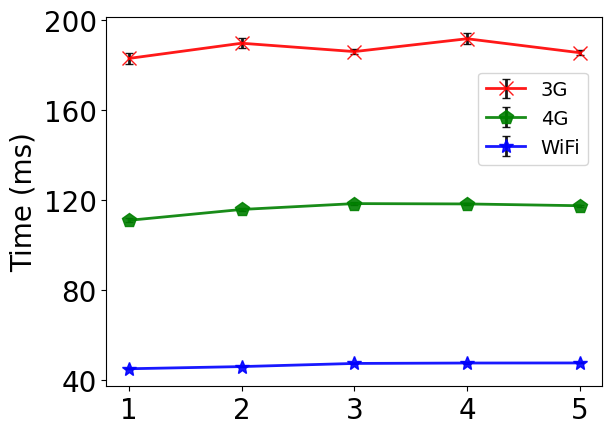

In [5]:
# data
data_time_3G = [value*z_value*1000 for value in mean_time_3G]
data_time_4G = [value*z_value*1000 for value in mean_time_4G]
data_time_wifi = [value*z_value*1000 for value in mean_time_wifi]

error_time_3G = [value*z_value*1000 for value in std_time_3G]
error_time_4G = [value*z_value*1000 for value in std_time_4G]
error_time_wifi = [value*z_value*1000 for value in std_time_wifi]

pod = range(1,6)

plot.errorbar(pod, data_time_3G,  linewidth=2,color = 'r', label = '3G', yerr=error_time_3G, alpha=0.9, marker='x', markersize=10, ecolor='black', capsize=3 )
plot.errorbar(pod, data_time_4G,  linewidth=2,color = 'g', label = '4G', yerr=error_time_4G, alpha=0.9,  marker='p', markersize=10,ecolor='black', capsize=3 )
plot.errorbar(pod, data_time_wifi,  linewidth=2,color = 'b', label = 'WiFi', yerr=error_time_wifi, alpha=0.9,  marker='*', markersize=10, ecolor='black', capsize=3 )

# plot.plot(pod, data_time_3G, color = 'r', label = '3G' )
# plot.plot(pod, data_time_4G, color = 'g', label = '4G')
# plot.plot(pod, data_time_wifi, color = 'b', label = 'wifi')

tick_fontsize = 20
label_fontsize = 20
lg_fontsize = 14

# plot.xticks(x, networks)
plot.tick_params(axis='both', which='major', labelsize=tick_fontsize)
plot.yticks(np.linspace(40, 200, 5))

plot.ylabel('Time (ms)', fontsize = label_fontsize)
# plot.xlabel("Pod number", fontsize = label_fontsize)
legend_location = (0.75, 0.6)

# plot.title("Warm CPU to Active")
# plot.savefig('/home/core/datn/pdf/warm_cpu_to_active.png', bbox_inches='tight')
plot.legend(loc=legend_location, fontsize = lg_fontsize)
plot.savefig('./pdf/latency-3c.pdf', bbox_inches='tight')
plot.show()
